## Load libraries

In [284]:
import os
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [285]:
import hw

## Explore cropped data

In [286]:
cropped_data_dir = 'data/CroppedYale/'
cropped = hw.LoadCropped(cropped_data_dir)

In [287]:
image_count = []
for i in cropped.faces:
    image_count.append(len(i.T))

## Count images per subject

In [288]:
np.array(image_count).min()

59

In [289]:
np.array(image_count).max()

64

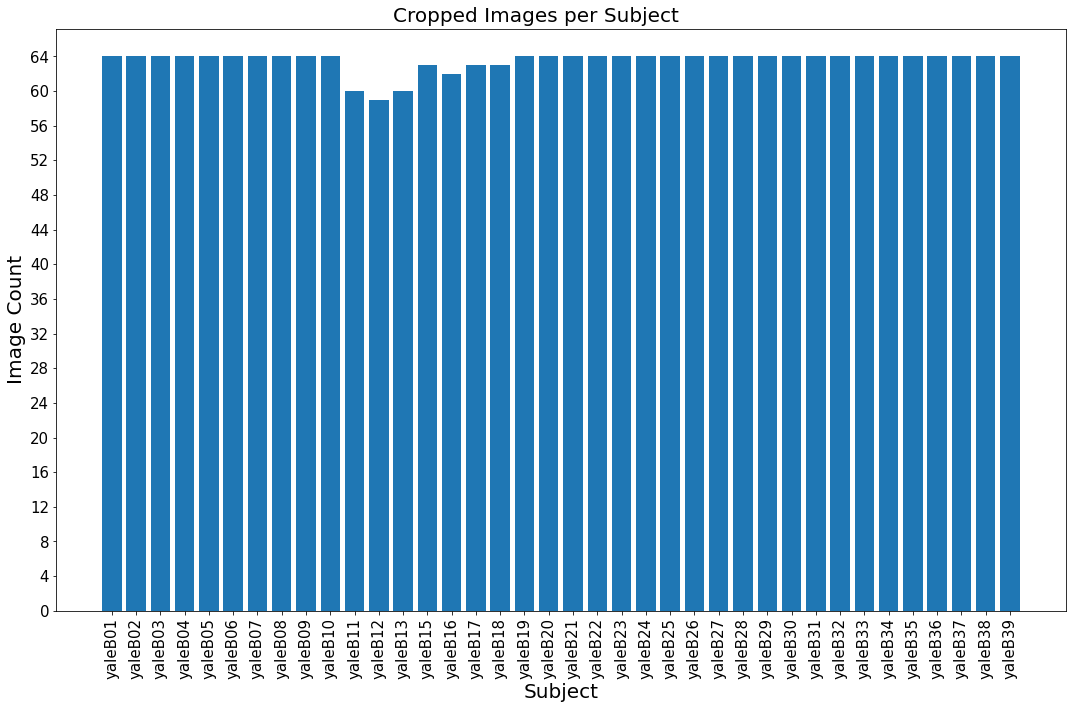

In [290]:
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(cropped.target_names, image_count)
ax.tick_params(axis='x', labelsize=15, rotation=90)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Subject', fontsize=20)
ax.set_ylabel('Image Count', fontsize=20)
ax.xaxis.set_ticks(np.arange(len(image_count)))
ax.yaxis.set_ticks(np.arange(max(image_count)+1)[::4])
fig.suptitle('Cropped Images per Subject', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig('plots/exploration/cropped_images_bar_chart.png');

## Plot first image per subject

In [291]:
face_images_list = hw.get_first_face_per_dir(cropped.face_dirs)
image_arrays = hw.load_images(face_images_list)

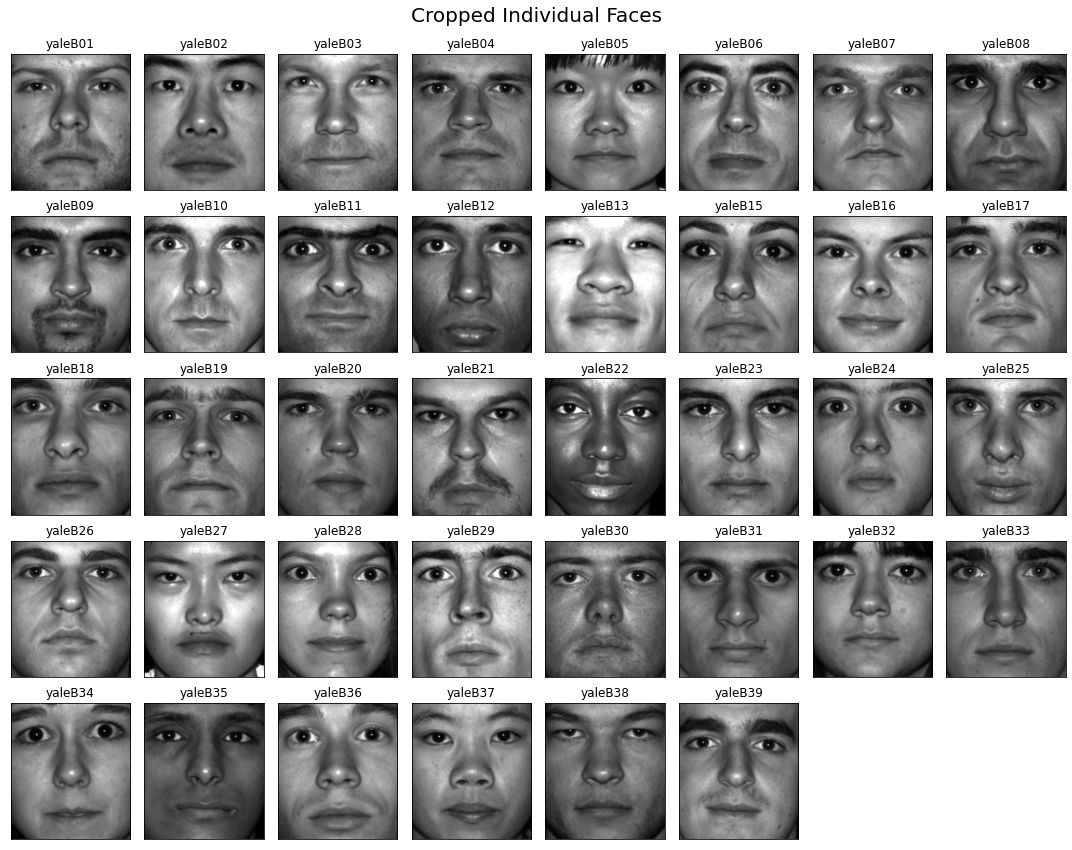

In [292]:
hw.plot_images_subset(image_arrays,
                       rows = 5,
                       columns = 8,
                       figsize= (15,12),
                       labels = cropped.target_names)
plt.suptitle('Cropped Individual Faces', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.93);
plt.savefig('plots/exploration/cropped_images.png');

## Plot different lighting conditions

In [293]:
conditions = []
for i in cropped.all_file_names:
    c = os.path.split(i)[-1].split('_')[-1].split('.')[0]
    conditions.append(c)

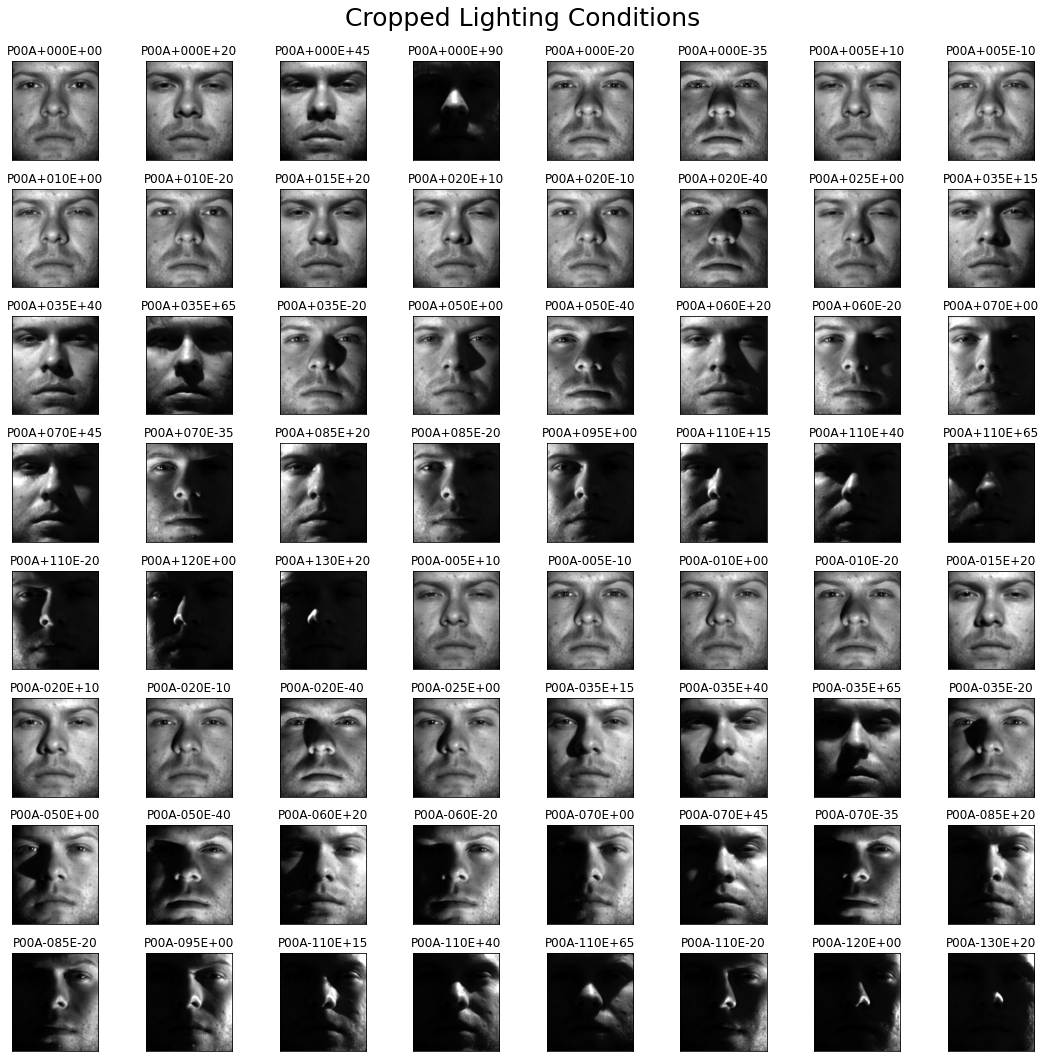

In [294]:
hw.plot_images_subset(cropped.X,
                      rows = 8,
                      columns = 8,
                      figsize= (15,15),
                      labels = conditions,
                      reshape = (cropped.h,cropped.w))

plt.suptitle('Cropped Lighting Conditions', fontsize=25)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.savefig('plots/exploration/cropped_lighting.png');

## SVD

In [710]:
U,S,VT = np.linalg.svd(cropped.X.T,full_matrices=0) 

### Modes necessary to explain 99% of the data

In [711]:
var_explained = np.round(S**2/np.sum(S**2), decimals=100)
thresh = 0.99
cdf=np.cumsum(var_explained)
n_components = np.where(cdf>thresh)[0][0]
n_components

139

In [712]:
n_components / len(cdf)

0.05758077879038939

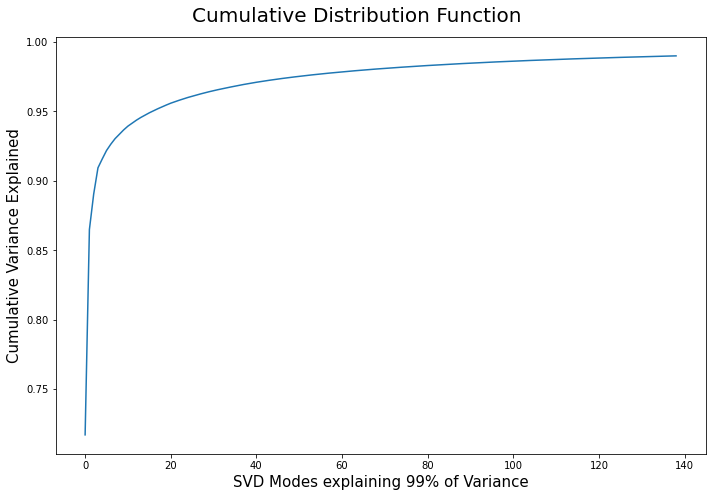

In [677]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(np.cumsum(var_explained[:n_components]))
ax.set_xlabel('SVD Modes explaining 99% of Variance', fontsize=15)
ax.set_ylabel('Cumulative Variance Explained', fontsize=15)
fig.suptitle('Cumulative Distribution Function', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig('plots/exploration/cropped_cdf_svd_modes.png');

### Dominant SVD modes

In [713]:
var_explained = np.round(S**2/np.sum(S**2), decimals=2)
var_explained = var_explained[var_explained >= 0.01]

In [714]:
np.sum(var_explained)

0.9400000000000001

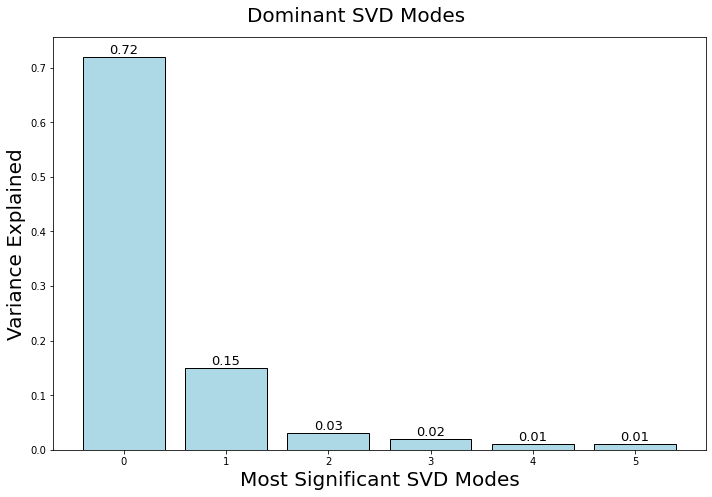

In [680]:
fig, ax = plt.subplots(figsize=(10,7))
bar_plot = ax.bar(np.arange(len(var_explained)), var_explained, color="lightblue", ec='k')

for p in bar_plot.patches:
    width = p.get_width()
    ax.text(p.get_x() + p.get_width()/2., 
            p.get_height()+0.001, 
            np.round(p.get_height(), 2), 
            fontsize=13, color='k', ha='center', va='bottom')
    
    
ax.set_xlabel('Most Significant SVD Modes', fontsize=20)
ax.set_ylabel('Variance Explained', fontsize=20)

fig.suptitle('Dominant SVD Modes', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig('plots/exploration/cropped_svd_modes.png');

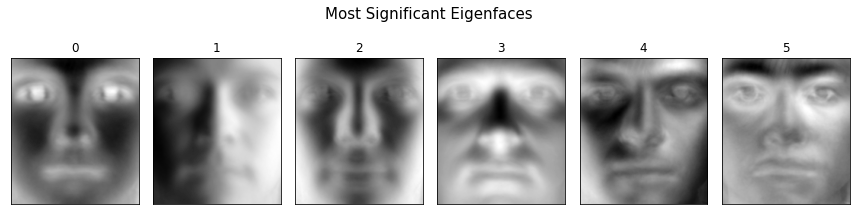

In [692]:
hw.plot_images_subset(U.T,
                      rows = 1,
                      columns = 6,
                      figsize= (12,10),
                      reshape = (cropped.h,cropped.w),
                      labels = np.arange(6))

plt.suptitle('Most Significant Eigenfaces', fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=1.6)
plt.savefig('plots/exploration/cropped_svd_eigenfaces.png');

## Reconstruction

In [682]:
step = np.arange(10,170,10)

In [644]:
stack = []
reconstructions = []
labels = []
for i in step:
    h = U[:,:i] @ (U[:,:i].T @ cropped.X[:1].T)
    reconstructions.append(h.T[-1])
    c = "modes: " + str(i)
    labels.append(c)

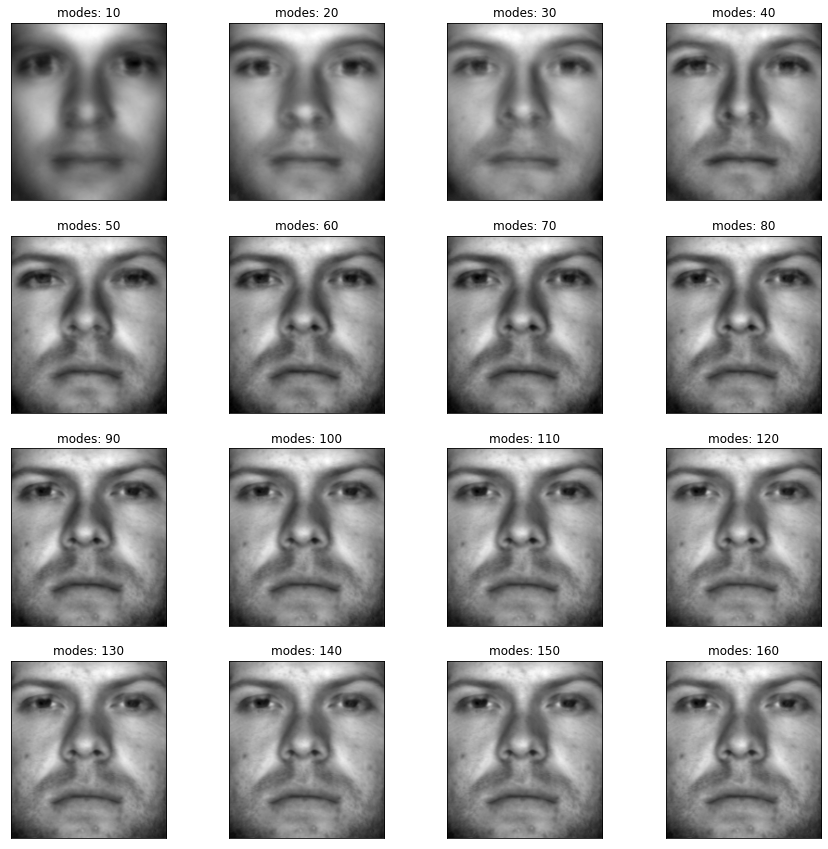

In [645]:
hw.plot_images_subset(reconstructions,
                      rows = 4,
                      columns = 4,
                      figsize= (15,15),
                      reshape = (cropped.h,cropped.w),
                      labels = labels)

plt.savefig('plots/exploration/cropped_svd_modes_1.png');

In [646]:
reconstructions = []
labels = []
for i in step:
    h = U[:,:i] @ (U[:,:i].T @ cropped.X[:30].T)
    reconstructions.append(h.T[-1])
    c = "modes: " + str(i)
    labels.append(c)


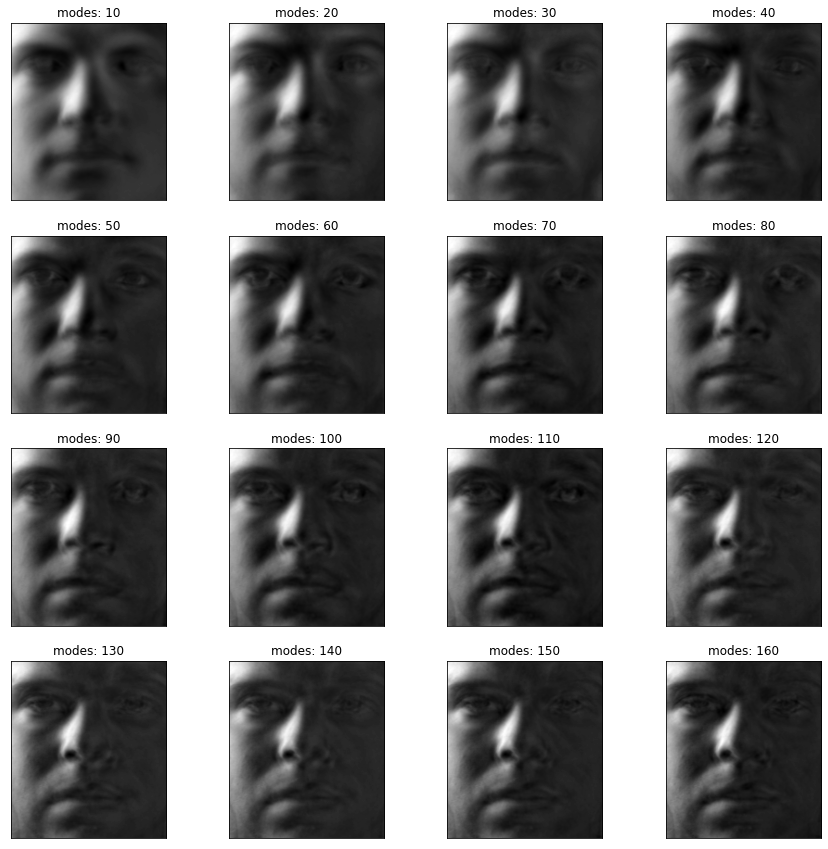

In [647]:
hw.plot_images_subset(reconstructions,
                      rows = 4,
                      columns = 4,
                      figsize= (15,15),
                      reshape = (cropped.h,cropped.w),
                      labels = labels)

plt.savefig('plots/exploration/cropped_svd_modes_2.png');

## Explore uncropped data

In [547]:
uncropped_data_dir = 'data/yalefaces_uncropped/yalefaces/'

In [548]:
uncropped = hw.LoadUncropped(uncropped_data_dir)

In [549]:
subject_id = []
conditions = []
for i in uncropped.all_file_names:
    a,b = os.path.split(i)[-1].split('.')
    subject_id.append(a)
    conditions.append(b)

## Count images per subject

In [550]:
len(Counter(subject_id).keys())

15

In [551]:
Counter(subject_id)

Counter({'subject01': 11,
         'subject02': 11,
         'subject03': 11,
         'subject04': 11,
         'subject05': 11,
         'subject06': 11,
         'subject07': 11,
         'subject08': 11,
         'subject09': 11,
         'subject10': 11,
         'subject11': 11,
         'subject12': 11,
         'subject13': 11,
         'subject14': 11,
         'subject15': 11})

In [552]:
image_count = list(Counter(subject_id).values())

In [553]:
ids = []
for i in list(Counter(subject_id).keys()):
    ids.append(i[-2:])

In [554]:
n_components = len(var_explained[var_explained > 0.001])
n_components

139

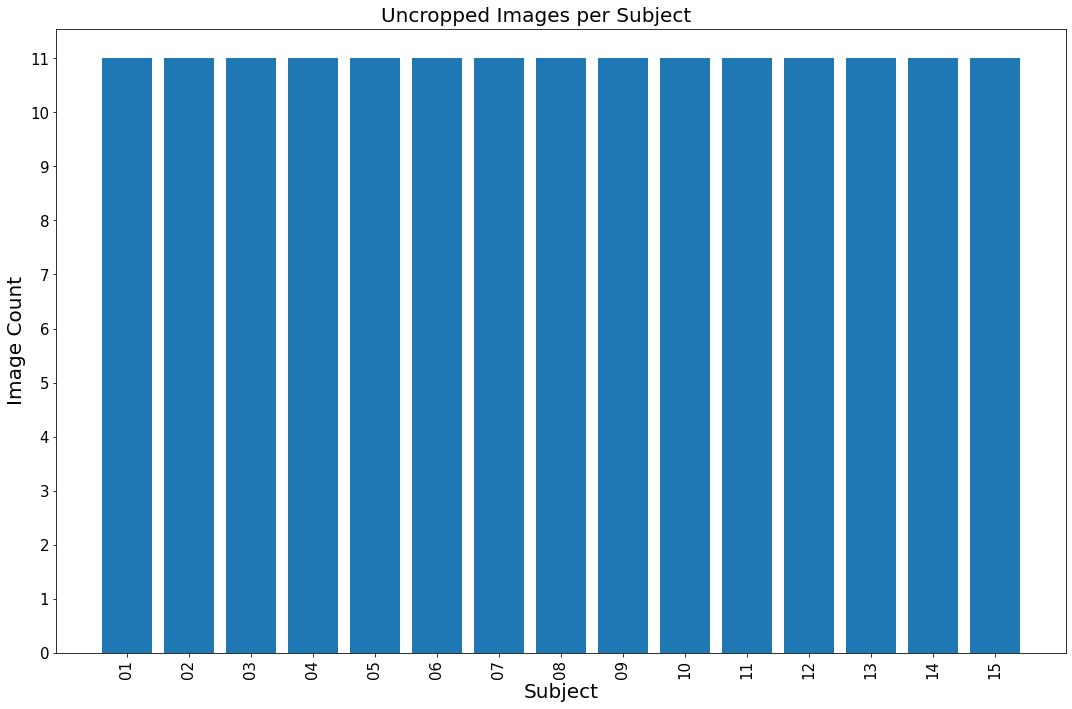

In [555]:
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(ids, image_count)
ax.tick_params(axis='x', labelsize=15, rotation=90)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Subject', fontsize=20)
ax.set_ylabel('Image Count', fontsize=20)
ax.xaxis.set_ticks(np.arange(len(image_count)))
ax.yaxis.set_ticks(np.arange(max(image_count)+1))
fig.suptitle('Uncropped Images per Subject', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig('plots/exploration/uncropped_images_bar_chart.png');

## Plot first image per subject

In [556]:
image_arrays = hw.load_images(np.array(uncropped.all_file_names)[::11])

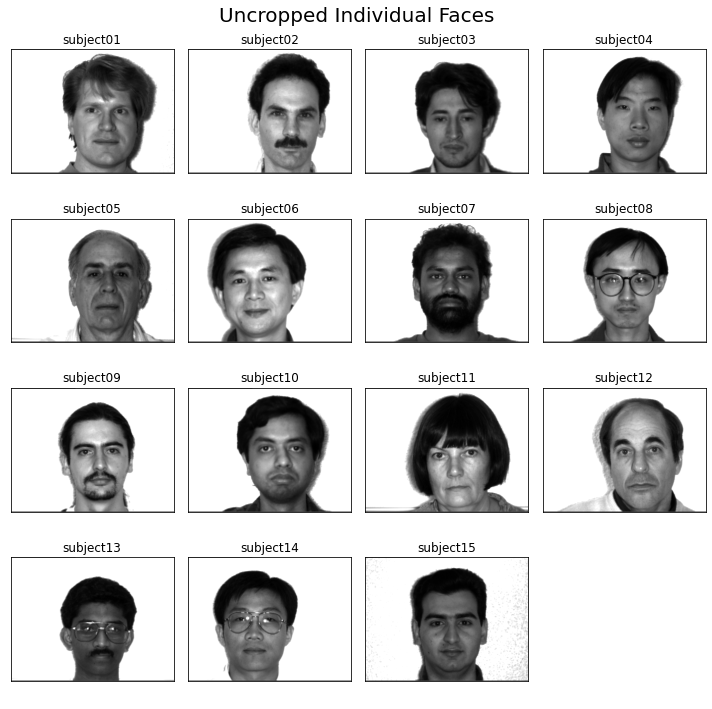

In [557]:
hw.plot_images_subset(image_arrays,
                       rows = 4,
                       columns = 4,
                       figsize= (10,10),
                       labels = list(Counter(subject_id).keys()))

plt.suptitle('Uncropped Individual Faces', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig('plots/exploration/uncropped_images.png');

## Plot different lighting conditions

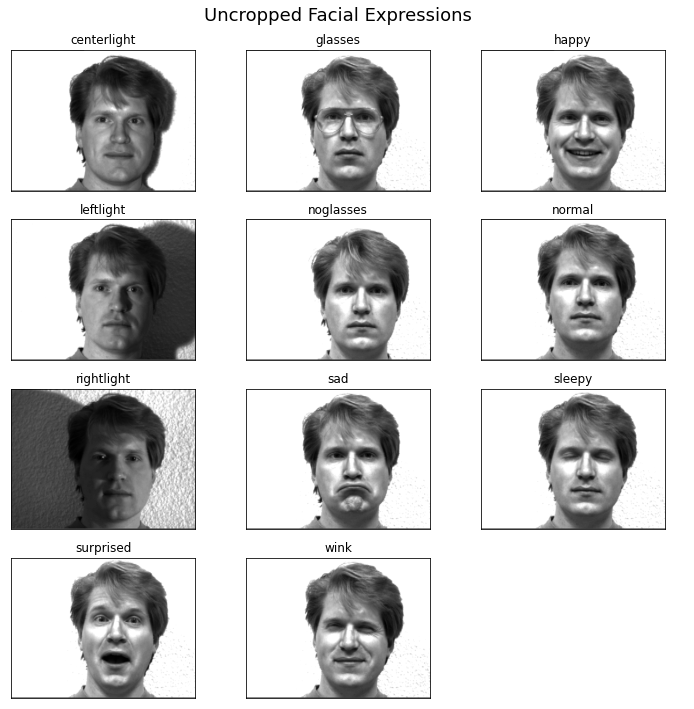

In [558]:
hw.plot_images_subset(uncropped.X[:11],
                       rows = 4,
                       columns = 3,
                       figsize= (10,10),
                       labels = list(Counter(conditions).keys()),
                      reshape = (uncropped.h,uncropped.w))

plt.suptitle('Uncropped Facial Expressions', fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig('plots/exploration/uncropped_facial_expressions.png');

## SVD

In [717]:
U,S,VT = np.linalg.svd(uncropped.X.T,full_matrices=0) 

## Modes necessary to explain 99% of data

In [718]:
var_explained = np.round(S**2/np.sum(S**2), decimals=100)
thresh = 0.99
cdf=np.cumsum(var_explained)
n_components = np.where(cdf>thresh)[0][0]
n_components

28

In [719]:
n_components / len(cdf)

0.1696969696969697

In [720]:
120 / len(cdf)

0.7272727272727273

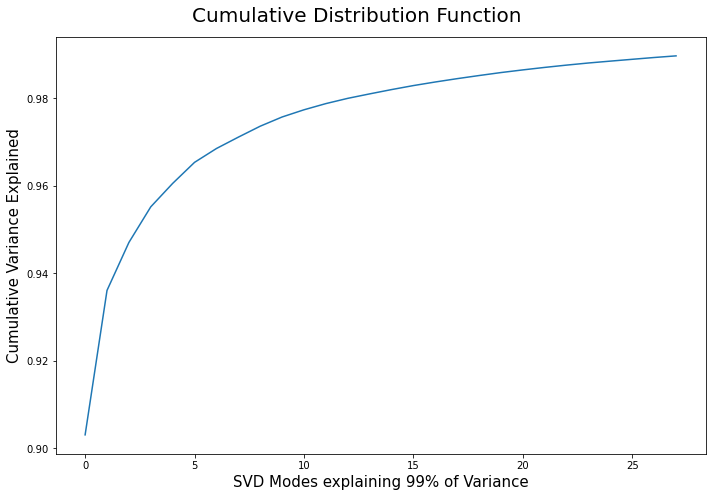

In [696]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(np.cumsum(var_explained[:n_components]))
ax.set_xlabel('SVD Modes explaining 99% of Variance', fontsize=15)
ax.set_ylabel('Cumulative Variance Explained', fontsize=15)
fig.suptitle('Cumulative Distribution Function', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig('plots/exploration/uncropped_cdf_svd_modes.png');

In [697]:
var_explained = np.round(S**2/np.sum(S**2), decimals=2)
var_explained = var_explained[var_explained >= 0.01]

In [698]:
np.sum(var_explained)

0.9600000000000001

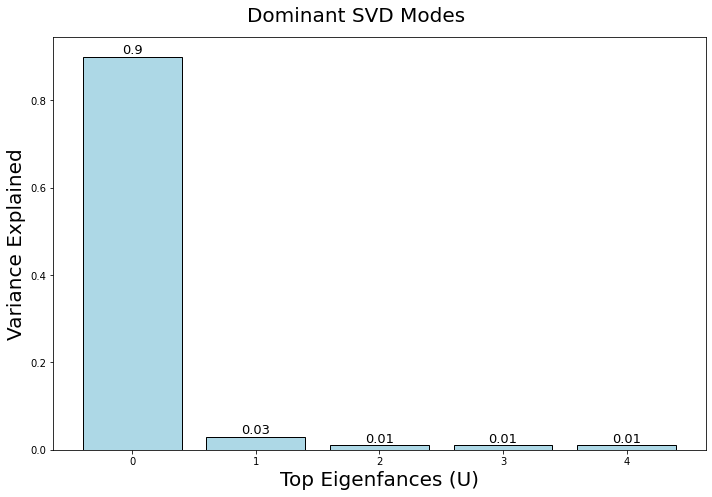

In [699]:
fig, ax = plt.subplots(figsize=(10,7))
bar_plot = ax.bar(np.arange(len(var_explained)), var_explained, color="lightblue", ec='k')

for p in bar_plot.patches:
    width = p.get_width()
    ax.text(p.get_x() + p.get_width()/2., 
            p.get_height()+0.001, 
            np.round(p.get_height(), 2), 
            fontsize=13, color='k', ha='center', va='bottom')
    
    
ax.set_xlabel('Top Eigenfances (U)', fontsize=20)
ax.set_ylabel('Variance Explained', fontsize=20)

fig.suptitle('Dominant SVD Modes', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig('plots/exploration/uncropped_svd_modes.png');

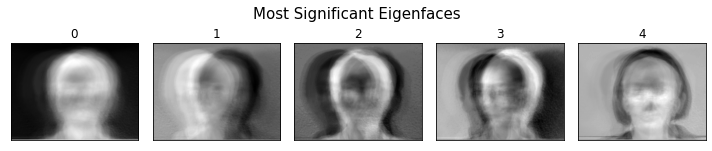

In [707]:
hw.plot_images_subset(U.T,
                      rows = 1,
                      columns = 5,
                      figsize= (10,7),
                      reshape = (uncropped.h,uncropped.w),
                      labels = np.arange(5))

plt.suptitle('Most Significant Eigenfaces', fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=1.6)
plt.savefig('plots/exploration/uncropped_svd_eigenfaces.png');

In [701]:
step = np.arange(10,170,10)

In [702]:
stack = []
reconstructions = []
labels = []
for i in step:
    h = U[:,:i] @ (U[:,:i].T @ uncropped.X[:1].T)
    reconstructions.append(h.T[-1])
    c = "modes: " + str(i)
    labels.append(c)

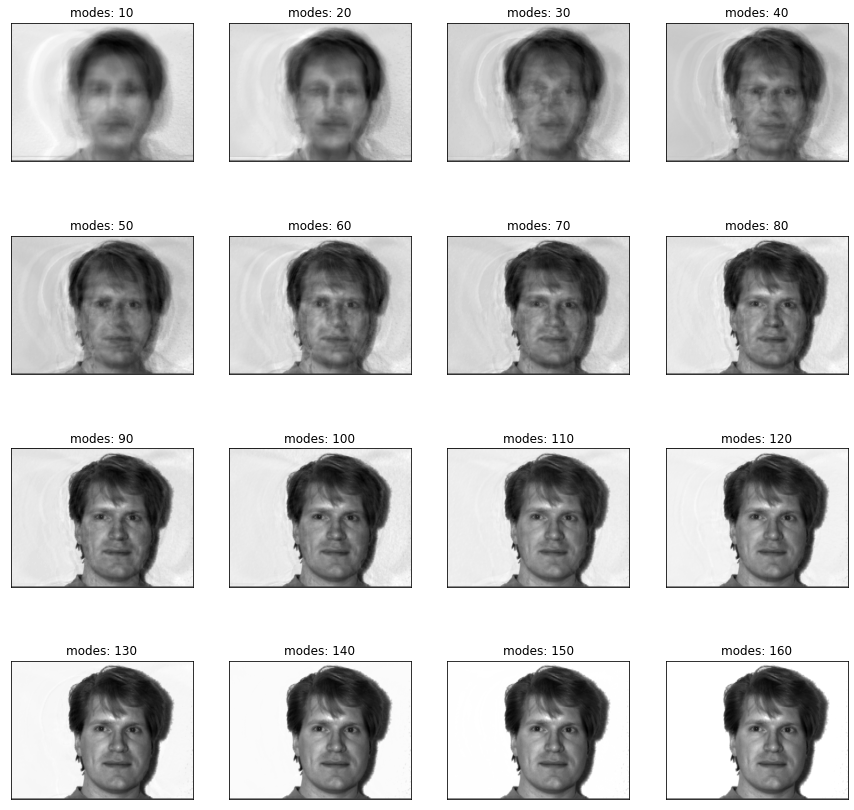

In [703]:
hw.plot_images_subset(reconstructions,
                      rows = 4,
                      columns = 4,
                      figsize= (15,15),
                      reshape = (uncropped.h,uncropped.w),
                      labels = labels)

plt.savefig('plots/exploration/uncropped_svd_modes_1.png');

In [704]:
reconstructions = []
labels = []
for i in step:
    h = U[:,:i] @ (U[:,:i].T @ uncropped.X[:7].T)
    reconstructions.append(h.T[-1])
    c = "modes: " + str(i)
    labels.append(c)


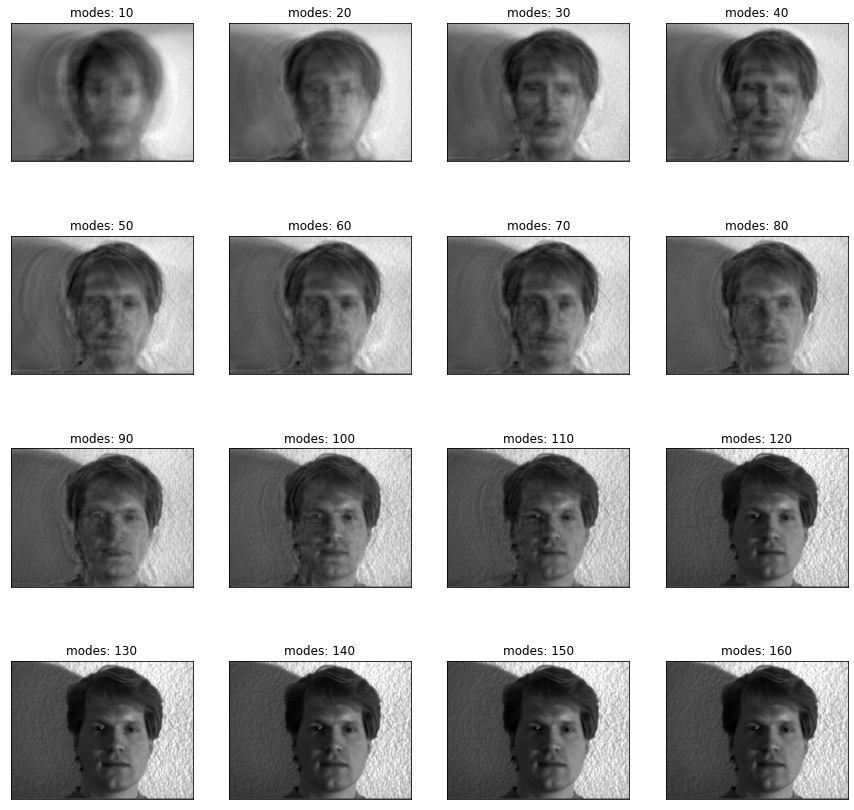

In [705]:
hw.plot_images_subset(reconstructions,
                      rows = 4,
                      columns = 4,
                      figsize= (15,15),
                      reshape = (uncropped.h,uncropped.w),
                      labels = labels)

plt.savefig('plots/exploration/uncropped_svd_modes_2.png');

#### Define functions

In [2]:
def load_images(image_file_name_list,
                flatten=False):
    images_list = []

    for i, v in enumerate(image_file_name_list):
        img = mpimg.imread(image_file_name_list[i])
        if flatten:
            images_list.append(img.flatten())
        else:
            images_list.append(img)

    image_arrays = np.array(images_list)
    
    return image_arrays

In [3]:
def plot_images_subset(image_arrays,
                       rows = 5,
                       columns = 5,
                       reshape=None):

    plt.figure(figsize=(10, 10))

    for i in range(rows*columns):
        ax = plt.subplot(rows, columns, i + 1)
        
        if reshape:
            image = image_arrays[i].reshape(reshape)
        else:
            image = image_arrays[i]
        ax.imshow(image)
        ax.set_xticks(())
        ax.set_yticks(())

In [4]:
def get_first_face_per_dir(face_dirs):
    face_images_list = []
    for i, v in enumerate(face_dirs):
        images_fn = sorted(glob.glob(face_dirs[i]+'/*.pgm'))
        face_images_list.append(images_fn[0])
        
    return face_images_list

#### Explore cropped data

In [5]:
cropped_data_dir = 'data/CroppedYale/'
images_fn = sorted(glob.glob(cropped_data_dir+'*/*.pgm'))

In [6]:
len(images_fn)

2414

In [24]:
img = mpimg.imread(images_fn[0])
cropped_shape = img.shape
cropped_shape

(192, 168)

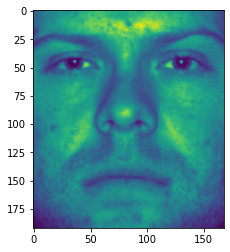

In [25]:
plt.imshow(img);

#### First 25 images in first directory

In [26]:
image_arrays = load_images(images_fn)

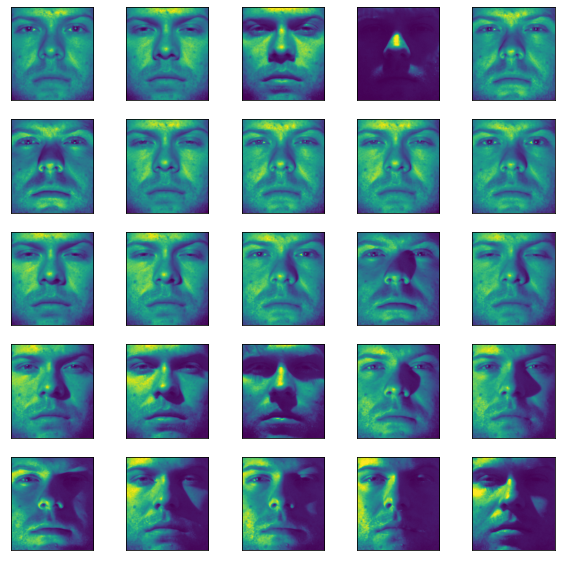

In [27]:
plot_images_subset(image_arrays)

In [28]:
del image_arrays

#### First image in first 36 directories

In [11]:
face_dirs = sorted(glob.glob(cropped_data_dir+'*'))
face_images_list = get_first_face_per_dir(face_dirs)
image_arrays = load_images(face_images_list)

In [12]:
len(face_dirs)

38

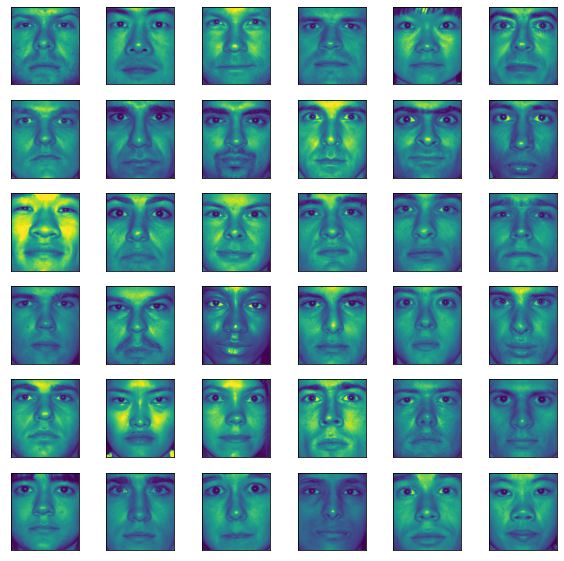

In [13]:
plot_images_subset(image_arrays,
                       rows = 6,
                       columns = 6)

In [14]:
del image_arrays

#### Explore uncropped images

In [7]:
uncropped_data_dir = 'data/yalefaces_uncropped/yalefaces/'
images_fn = sorted(glob.glob(uncropped_data_dir+'*'))

In [8]:
len(images_fn)

165

In [16]:
images_fn[0].split('.')[-1]

'centerlight'

In [16]:
img = mpimg.imread(images_fn[0])
uncropped_shape = img.shape
uncropped_shape

(243, 320)

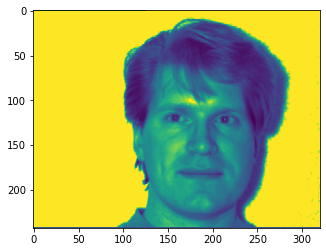

In [17]:
plt.imshow(img);

#### First 25 images

In [18]:
image_arrays = load_images(images_fn)

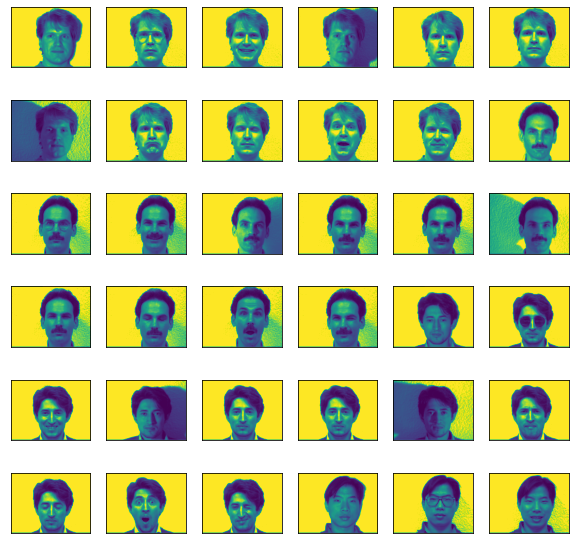

In [19]:
plot_images_subset(image_arrays,
                       rows = 6,
                       columns = 6)

In [20]:
uncropped_data_dir = 'data/yalefaces_uncropped/yalefaces/'
images_fn = sorted(glob.glob(uncropped_data_dir+'*'))

In [21]:
centerlight = sorted(glob.glob(uncropped_data_dir+'*centerlight'))
glasses     = sorted(glob.glob(uncropped_data_dir+'*glasses'))
happy       = sorted(glob.glob(uncropped_data_dir+'*happy'))
leftlight   = sorted(glob.glob(uncropped_data_dir+'*leftlight'))
noglasses   = sorted(glob.glob(uncropped_data_dir+'*noglasses'))
normal      = sorted(glob.glob(uncropped_data_dir+'*normal'))
rightlight  = sorted(glob.glob(uncropped_data_dir+'*rightlight'))
sad         = sorted(glob.glob(uncropped_data_dir+'*sad'))
sleepy      = sorted(glob.glob(uncropped_data_dir+'*sleepy'))
surprised   = sorted(glob.glob(uncropped_data_dir+'*surprised'))
wink        = sorted(glob.glob(uncropped_data_dir+'*wink'))

In [22]:
# image_arrays = load_images(centerlight)
# plot_images_subset(image_arrays,
#                        rows = 5,
#                        columns = 3)

In [23]:
# image_arrays = load_images(glasses)
# plot_images_subset(image_arrays,
#                        rows = 5,
#                        columns = 3)

In [24]:
# image_arrays = load_images(happy)
# plot_images_subset(image_arrays,
#                        rows = 5,
#                        columns = 3)

In [25]:
# image_arrays = load_images(leftlight)
# plot_images_subset(image_arrays,
#                        rows = 5,
#                        columns = 3)

In [26]:
# image_arrays = load_images(noglasses)
# plot_images_subset(image_arrays,
#                        rows = 5,
#                        columns = 3)

In [27]:
# image_arrays = load_images(normal)
# plot_images_subset(image_arrays,
#                        rows = 5,
#                        columns = 3)

In [28]:
# image_arrays = load_images(rightlight)
# plot_images_subset(image_arrays,
#                        rows = 5,
#                        columns = 3)

In [29]:
# image_arrays = load_images(sad)
# plot_images_subset(image_arrays,
#                        rows = 5,
#                        columns = 3)

In [30]:
# image_arrays = load_images(sleepy)
# plot_images_subset(image_arrays,
#                        rows = 5,
#                        columns = 3)

In [31]:
# image_arrays = load_images(surprised)
# plot_images_subset(image_arrays,
#                        rows = 5,
#                        columns = 3)

In [32]:
# image_arrays = load_images(wink)
# plot_images_subset(image_arrays,
#                        rows = 5,
#                        columns = 3)

###  1. Do an SVD analysis of the images (where each image is reshaped into a column vector and each column is a new image).

#### Load cropped image arrays

In [29]:
images_fn = sorted(glob.glob(cropped_data_dir+'*/*.pgm'))
image_arrays = load_images(images_fn, flatten=True)

#### Transpose

In [30]:
image_arrays = image_arrays.T
image_arrays.shape

(32256, 2414)

In [51]:
U,Sigma,VT = np.linalg.svd(image_arrays,full_matrices=0) 

In [32]:
U.shape

(32256, 2414)

In [33]:
Sigma.shape

(2414,)

In [34]:
VT.shape

(2414, 2414)

In [35]:
N = image_arrays.shape[0]

In [38]:
cutoff = (4/np.sqrt(3)) * np.sqrt(N) * 1
r = np.max(np.where(Sigma > cutoff))

In [39]:
r

1906

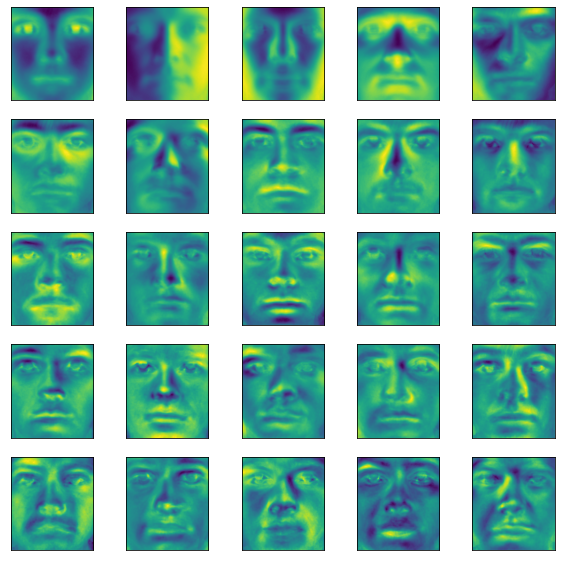

In [39]:
plot_images_subset(U.T,
                  reshape=cropped_shape,
                  rows=5,
                  columns=5)

### 2. What is the interpretation of the U, Σ and V matrices?

### 3. What does the singular value spectrum look like and how many modes are necessary for good image reconstructions? (i.e. what is the rank r of the face space?)


In [44]:
Sigma = Sigma[:150]
var_explained = np.diag(np.diag(Sigma)/np.sum(np.diag(Sigma)))

In [52]:
var_explained = np.diag(np.diag(Sigma)/np.sum(np.diag(Sigma)))

In [54]:
len(var_explained[var_explained > 0.001])

161

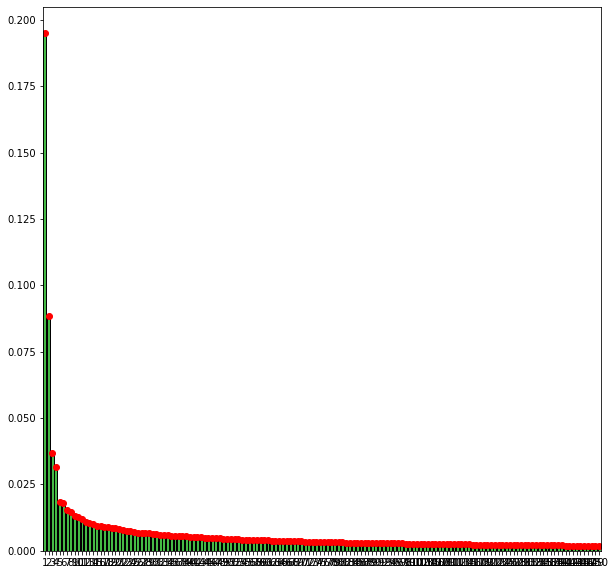

In [45]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(1,1,1)
ax.plot(var_explained, 'ro');
sns.barplot(x=list(range(1,len(var_explained)+1)),
            y=var_explained, 
            color="limegreen", 
            ec='k', 
            ax=ax)

### 4. compare the difference between the cropped (and aligned) versus uncropped images.

#### Load and transpose uncropped image arrays

In [42]:
uncropped_data_dir = 'data/yalefaces_uncropped/yalefaces/'
images_fn = sorted(glob.glob(uncropped_data_dir+'*'))

In [43]:
image_arrays = load_images(images_fn,flatten=True)
image_arrays = image_arrays.T

#### SVD

In [44]:
U,Sigma,VT = np.linalg.svd(image_arrays,full_matrices=0) 

noisy data


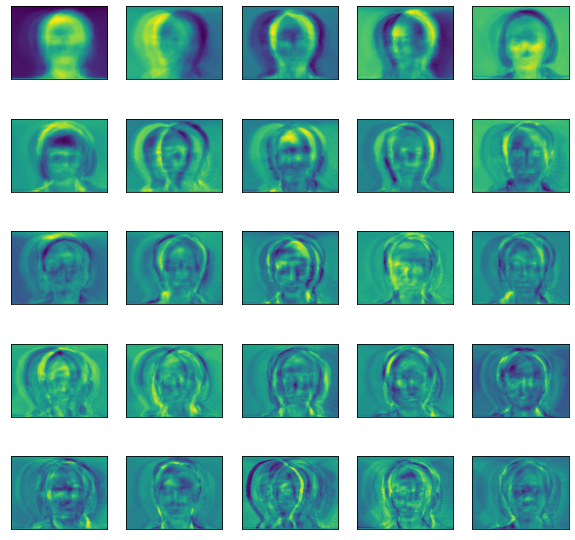

In [45]:
plot_images_subset(U.T,
                  reshape=uncropped_shape)

print('noisy data')

In [46]:
Sigma = Sigma[:60]
var_explained = np.diag(np.diag(Sigma)/np.sum(np.diag(Sigma)))

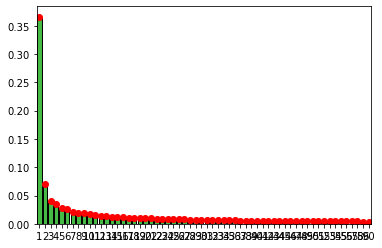

In [47]:
ax = plt.subplot(1,1,1)
ax.plot(var_explained, 'ro');
sns.barplot(x=list(range(1,len(var_explained)+1)),
            y=var_explained, 
            color="limegreen", 
            ec='k', 
            ax=ax)

## Face Identification
See if you can build a classifier to identify individuals in the training set.

In [48]:
mean_face = np.mean(image_arrays, axis=1)

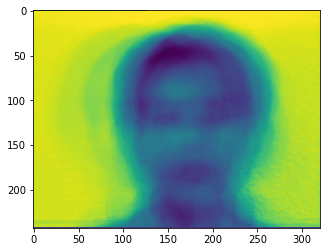

In [49]:
plt.imshow(mean_face.reshape(uncropped_shape))

In [50]:
X = image_arrays.T - mean_face

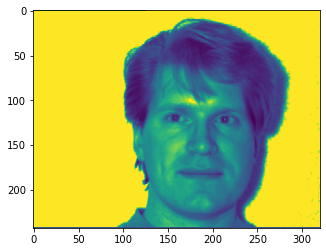

In [51]:
plt.imshow(image_arrays.T[0].reshape(uncropped_shape))

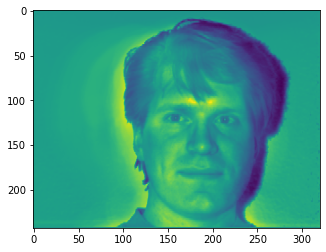

In [52]:
plt.imshow(X[0].reshape(uncropped_shape))

In [53]:
X = X.T

In [54]:
X.shape

(77760, 165)

In [55]:
U,Sigma,VT = np.linalg.svd(X,full_matrices=0) 

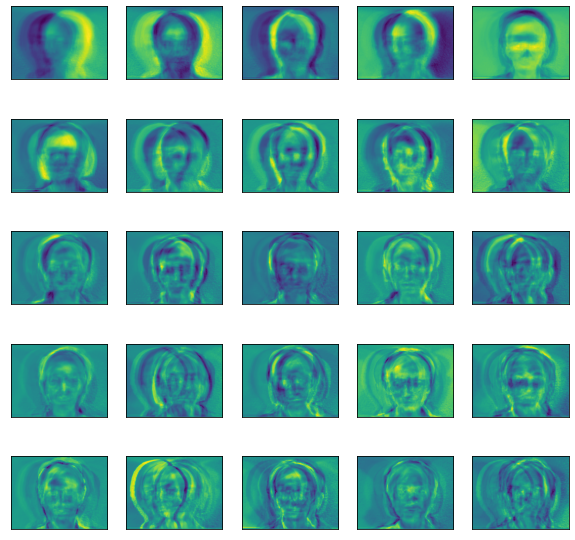

In [56]:
plot_images_subset(U.T,
                  reshape=uncropped_shape)


#### Test 1: Face Classification
Consider the various faces and see if you can build a classifier that can reasonably identify an individual face.

In [57]:
dirs = sorted(glob.glob(cropped_data_dir+'*'))
images_per_directory = []

for i in dirs:
    c = len(glob.glob(i+'/*.pgm'))
    images_per_directory.append(c)
    
nfaces = np.array(images_per_directory)

In [58]:
cropped_data_dir = 'data/CroppedYale/'
images_fn = sorted(glob.glob(cropped_data_dir+'*/*.pgm'))

In [59]:
faces = load_images(images_fn,flatten=True).T

In [60]:
average = np.mean(faces,axis=1)

In [61]:
X = faces.T - average

In [62]:
X.T.shape

(32256, 2414)

In [63]:
U, S, VT = np.linalg.svd(X.T,full_matrices=0)

In [64]:
VT.shape

(2414, 2414)

In [65]:
U.shape

(32256, 2414)

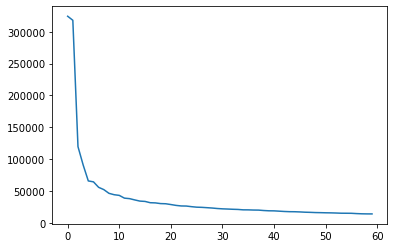

In [66]:
plt.plot(S[:60])

In [67]:
P1num = 2 # Person number 2
P2num = 7 # Person number 7

In [68]:
P1 = faces[:,np.sum(nfaces[:(P1num-1)]):np.sum(nfaces[:P1num])]
P2 = faces[:,np.sum(nfaces[:(P2num-1)]):np.sum(nfaces[:P2num])]

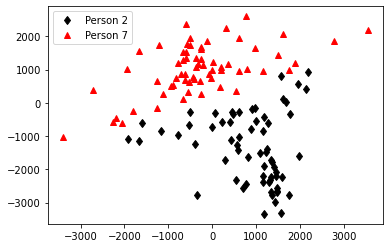

In [69]:
P1 = P1 - np.tile(average,(P1.shape[1],1)).T
P2 = P2 - np.tile(average,(P2.shape[1],1)).T

PCAmodes = [5, 6] # Project onto PCA modes 5 and 6
PCACoordsP1 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P1
PCACoordsP2 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P2

plt.plot(PCACoordsP1[0,:],PCACoordsP1[1,:],'d',Color='k',label='Person 2')
plt.plot(PCACoordsP2[0,:],PCACoordsP2[1,:],'^',Color='r',label='Person 7')

plt.legend()
plt.show()

In [70]:
PCACoordsP1.shape

(2, 64)

In [71]:
PCAmodes-np.ones_like(PCAmodes)

array([4, 5])

In [72]:
p1 = sorted(glob.glob(cropped_data_dir+'yaleB01/*.pgm'))
p2 = sorted(glob.glob(cropped_data_dir+'yaleB02/*.pgm'))
p3 = sorted(glob.glob(cropped_data_dir+'yaleB03/*.pgm'))
p4 = sorted(glob.glob(cropped_data_dir+'yaleB04/*.pgm'))

a = load_images(p1,flatten=True)[:-20]
b = load_images(p2,flatten=True)[:-2] 
c = load_images(p3,flatten=True)[:-2]
d = load_images(p4,flatten=True)[:-2]

training = np.vstack([a,b,c,d])
training_average = np.mean(training.T, axis=1)

p1_ave = np.mean(a.T, axis=1)
p2_ave = np.mean(b.T, axis=1)
p3_ave = np.mean(c.T, axis=1)
p4_ave = np.mean(d.T, axis=1)

# a = load_images(p1,flatten=True)[-2:]
# b = load_images(p2,flatten=True)[-2:] 
# c = load_images(p3,flatten=True)[-2:]
# d = load_images(p4,flatten=True)[-2:]

# test = np.vstack([a,b,c,d])



In [73]:
X = training - training_average
X = training

In [74]:
U,Sigma,VT = np.linalg.svd(X.T,full_matrices=0) 

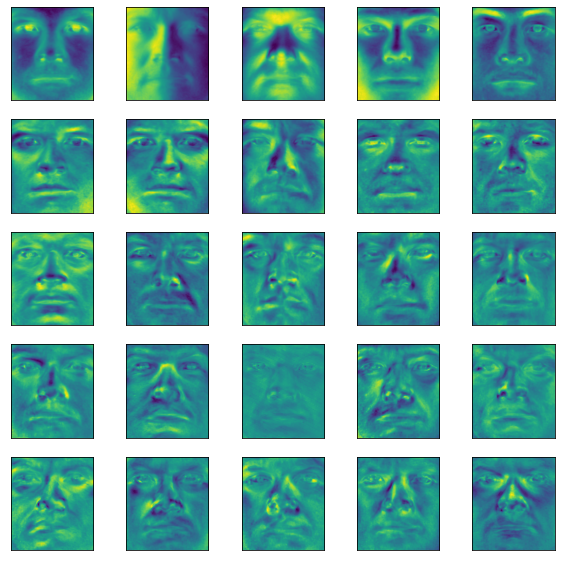

In [75]:
plot_images_subset(U.T,
                  reshape=cropped_shape)

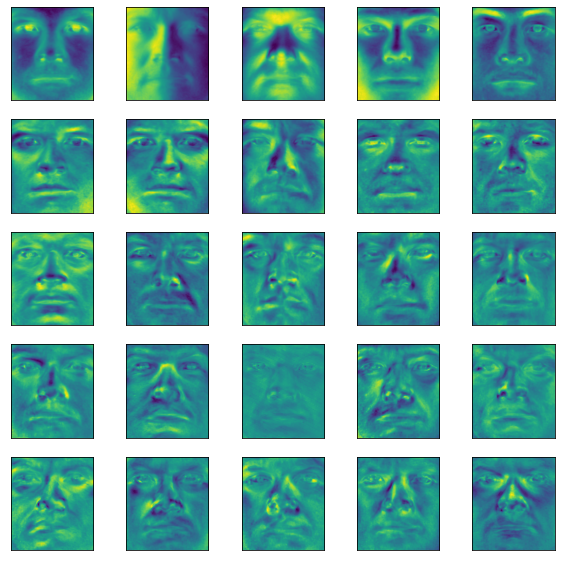

In [76]:
plot_images_subset(U.T,
                  reshape=cropped_shape)

In [77]:
j = np.vstack([p1_ave,p2_ave,p3_ave,p4_ave])

In [78]:
j = np.vstack([j,a])

In [79]:
j.shape

(48, 32256)

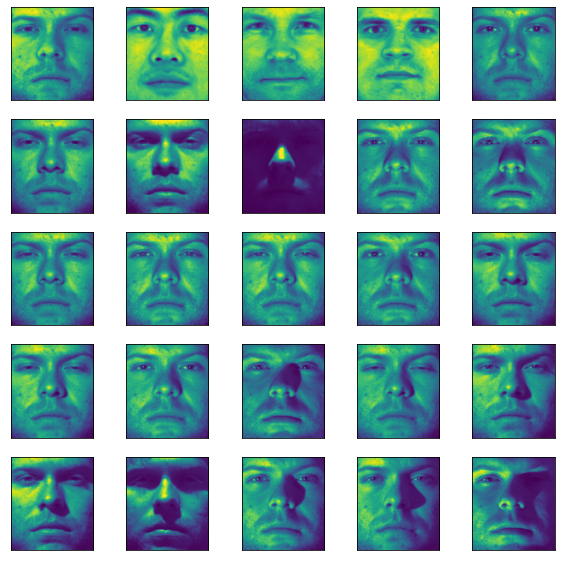

In [80]:
plot_images_subset(j,
                  reshape=cropped_shape)

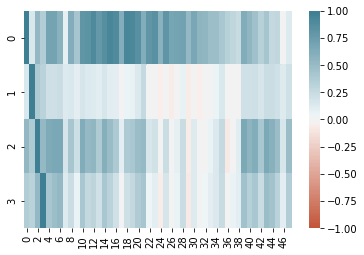

In [81]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame(j.T)
corr = df.corr()

ax = sns.heatmap(
    corr[:4], 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
#     square=True
)

In [82]:
tester = training[1]

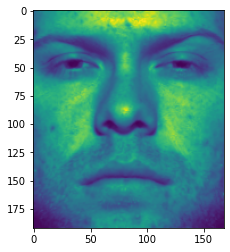

In [83]:
plt.imshow(tester.reshape(cropped_shape))

In [84]:
t = np.expand_dims(tester, axis=1)

In [85]:
# h = U[1:] @ (U.T[1:] @ t)

h = U[:,:10] @ (U[:,:10].T @ t)

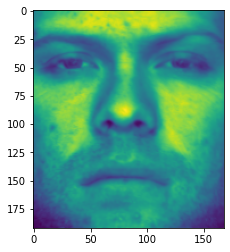

In [86]:
plt.imshow(h.reshape(cropped_shape,))

In [87]:
for i in [p1_ave, p2_ave, p3_ave, p4_ave]:
    j = i - h.T
    print(j.mean())
#     plt.imshow(j.reshape(cropped_shape))

-33.48678956001492
-38.32847181404282
-34.218080248982645
-54.297443328219714


In [88]:
h.T

array([[91.26191881, 92.11708784, 97.56765326, ...,  2.99806891,
         4.35697409,  4.46440536]])

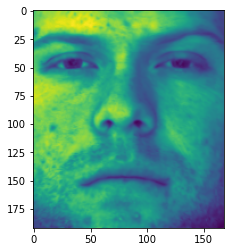

In [89]:
plt.imshow(p1_ave.reshape(cropped_shape,))

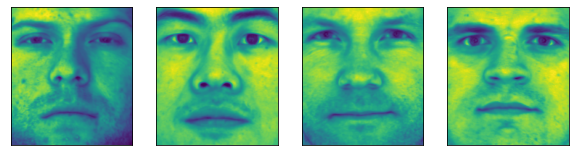

In [90]:
plot_images_subset([p1_ave, p2_ave, p3_ave, p4_ave],
                  reshape=cropped_shape,
                  rows=1,
                  columns=4)


In [91]:
av_faces = np.vstack([p1_ave, p2_ave, p3_ave, p4_ave])

In [92]:
av_faces.shape

(4, 32256)

In [93]:
training.shape

(230, 32256)

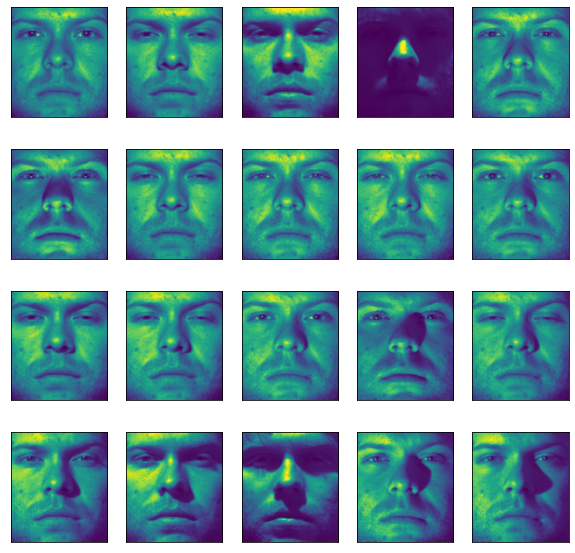

In [94]:
plot_images_subset(training,
                  reshape=cropped_shape,
                  columns = 5,
                  rows = 4)

In [95]:
U,Sigma,VT = np.linalg.svd(training.T,full_matrices=0) 

In [96]:
U.shape

(32256, 230)

In [98]:
# plt.imshow(p2[0].reshape(cropped_shape))

In [ ]:
t = np.expand_dims(p1[0], axis=1)

In [ ]:
t.shape

In [ ]:
plt.imshow(t.reshape(cropped_shape))

In [ ]:
r = 40

In [ ]:
U.shape

In [ ]:
h = U[:,:r] @ (U[:,:r].T @ t)

In [ ]:
h.mean()

In [ ]:
h.mean()

In [ ]:
plt.imshow(h.reshape(cropped_shape))

In [ ]:
t.shape

In [ ]:
p1[0].shape

In [ ]:
plot_images_subset(U.T,
                  reshape=cropped_shape,
                  columns = 2,
                  rows = 2)

In [ ]:
t = U @ np.diag(Sigma) @ VT

In [ ]:
r = 10

In [ ]:
Ur = U[:,1:r]
Sigmar = np.diag(Sigma[1:r])
VTr = VT[1:r,:]

In [ ]:
Ur.shape

In [ ]:
Sigmar.shape

In [ ]:
VTr.shape

In [ ]:
t = Ur @ Sigmar @ VTr

In [ ]:
Ur.shape

In [ ]:
plot_images_subset(t.T,
                  reshape=cropped_shape,
                  columns = 2,
                  rows = 2)

In [ ]:
plot_images_subset(t.T,
                  reshape=cropped_shape,
                  columns = 2,
                  rows = 2)

In [ ]:
Up1,Sigmap1,VTp1 = np.linalg.svd(p1,full_matrices=0) 

In [ ]:
Up1.shape

In [ ]:
Sigmap1.shape

In [ ]:
VTp1.shape

In [ ]:
t = Up1 @ Sigmar @ VTr

In [ ]:
plot_images_subset(t,
                  reshape=cropped_shape,
                  columns = 5,
                  rows = 4)

In [ ]:
U[:].shape

In [ ]:
np.diag(Sigma).shape

In [ ]:
U.shape

In [ ]:
VT.shape

In [ ]:
plot_images_subset(U.T,
                  reshape=cropped_shape,
                  columns = 5,
                  rows = 4)

In [ ]:
p1_ave = np.mean(p1.T, axis=1)
p2_ave = np.mean(p2.T, axis=1)
p3_ave = np.mean(p3.T, axis=1)
p4_ave = np.mean(p4.T, axis=1)

In [ ]:
p1 = sorted(glob.glob(cropped_data_dir+'yaleB01/*.pgm'))
p2 = sorted(glob.glob(cropped_data_dir+'yaleB02/*.pgm'))
p3 = sorted(glob.glob(cropped_data_dir+'yaleB03/*.pgm'))
p4 = sorted(glob.glob(cropped_data_dir+'yaleB04/*.pgm'))

p1 = load_images(p1,flatten=True)[5:7]
p2 = load_images(p2,flatten=True)[5:7] 
p3 = load_images(p3,flatten=True)[5:7]
p4 = load_images(p4,flatten=True)[5:7]

In [ ]:
test = np.vstack([p1,p2,p3,p4])

In [ ]:
test.shape

In [ ]:
plot_images_subset(test,
                  reshape=cropped_shape,
                  columns = 2,
                  rows = 4)

In [ ]:
d = test @ test.T

In [ ]:
import pandas as pd
df = pd.DataFrame(test.T)
df.corr()

In [ ]:
# U1,Sigma1,VT1 = np.linalg.svd(p1.T,full_matrices=0)
# U2,Sigma2,VT2 = np.linalg.svd(p1.T,full_matrices=0) 
# U3,Sigma3,VT3 = np.linalg.svd(p1.T,full_matrices=0) 
# U4,Sigma4,VT4 = np.linalg.svd(p1.T,full_matrices=0) 

In [ ]:
U,Sigma,VT = np.linalg.svd(training.T,full_matrices=0) 

In [ ]:
U.shape

In [ ]:
plot_images_subset(U.T,
                  reshape=cropped_shape,
                  columns = 5,
                  rows = 4)

In [ ]:
ave1 = np.expand_dims(p1_ave, axis=1)
ave2 = np.expand_dims(p2_ave, axis=1)
ave3 = np.expand_dims(p3_ave, axis=1)
ave4 = np.expand_dims(p4_ave, axis=1)

In [ ]:
ave1.shape

In [ ]:
proj1 = U*ave1
proj2 = U*ave2
proj3 = U*ave3
proj4 = U*ave4

In [ ]:
plt.bar(np.arange(len(proj1.T)-1),np.sum(proj1.T[1:],axis=1))

In [ ]:
plt.bar(np.arange(len(proj2.T)-1),np.sum(proj2.T[1:],axis=1))

In [ ]:
plt.bar(np.arange(len(proj3.T)-1),np.sum(proj3.T[1:],axis=1))

In [ ]:
plt.bar(np.arange(len(proj4.T)-1),np.sum(proj4.T[1:],axis=1))

In [ ]:
plot_images_subset(proj1.T,
                  reshape=cropped_shape,
                  columns = 5,
                  rows = 4)

In [ ]:
plot_images_subset(proj2.T,
                  reshape=cropped_shape,
                  columns = 5,
                  rows = 4)

In [ ]:
plot_images_subset(proj3.T,
                  reshape=cropped_shape,
                  columns = 5,
                  rows = 4)

In [ ]:
plot_images_subset(proj4.T,
                  reshape=cropped_shape,
                  columns = 5,
                  rows = 4)

In [ ]:
training.T.shape

In [ ]:
proj1.shape

In [ ]:
training.T.shape

In [ ]:
proj1.shape

In [ ]:
# cov = np.cov(np.array([training.T,proj1]))

#### Test 2: Gender Classification
Can you build an algorithm capable of recognizing men from women?

#### Test 3: Unsupervised algorithms
In an unsupervised way, can you develop algorithms that automatically find patters in the faces that naturally cluster?  

NOTE: You can use any (and hopefully all) of the different clustering and classification methods discussed. Be sure to compare them against each other in these tasks.